In [1]:
!pip install timeeval-gutenTAG

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
os.chdir("/content/drive/My Drive/Colab Notebooks/")
#data_dir = "/content/drive/My Drive/Colab Notebooks/"  # Example path
#datasets = os.listdir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from sklearn.metrics import roc_auc_score, accuracy_score
import scipy.stats as stats
import random
from keras.layers import Dense, Input, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
import random
import gc
random.seed(42)
from losses import load_loss
from scipy.signal import find_peaks

import json
from gutenTAG import GutenTAG, TrainingType, LABEL_COLUMN_NAME
from extract_ts_features import apply_time_series_transformations
from super_dean_ts import super_dean
from losses_super_dean import load_loss
with open('example.json') as f:
    config = json.load(f)

gutentag = GutenTAG(seed=1)
gutentag.load_config_dict(config)
datasets = gutentag.generate(return_timeseries=True)


list_dataset_40 = []
multiples_of_3 = [num for num in range(1, 193*3+1) if num % 3 == 0]
# Calculate 20% of the length of the list
sample_size = int(len(multiples_of_3) * 0.2)

# Randomly choose 20% of the numbers
random_sample = random.sample(multiples_of_3, sample_size)

log_file = pd.DataFrame(columns=[
    "dataset name", "anomaly score train", "anomaly score test",
    "test labels", "AUC ROC", "index of dataset", "feature importance"
])
bad_data = [492,  87 , 21 ,570 ,189 , 81 , 69, 327,  27,  24, 168 ,180, 573, 345, 453, 216,   6, 540,
 489, 120, 528]
def log_super_dean():
    count = len(log_file)
    for iter in random_sample:
        print(f"executing {count+1}th data set")
        df_test = datasets[iter].timeseries
        df_train = datasets[iter+1].timeseries
        name = datasets[iter].name

        #run the script
        out_metric, out_tr, out_test,feature_imp = super_dean(df_train, df_test,"wasserstein")

        #save the output
        log_file.loc[count,"dataset name"]=name

        log_file.at[count,"anomaly score train"] = str(out_tr.tolist())
        log_file.at[count,"anomaly score test"] = str(out_test.tolist())
        log_file.at[count,"test labels"] = str(list(datasets[iter].timeseries["is_anomaly"]))
        log_file.loc[count,"AUC ROC"]=out_metric
        log_file.loc[count,"index of dataset"]=iter
        log_file.loc[count,"feature importance"]=str(list(feature_imp))
        log_file.to_csv("gutentag 38 dataset loss = wasserstein + ft normalisation earlier v7.csv", index=False)
        del df_train, df_test, out_tr, out_test, out_metric
        gc.collect()
        count+=1
    print("Done!!")

if __name__ == "__main__":
    log_super_dean()


Initializing addons: 0it [00:00, ?it/s]
Generating datasets:   0%|          | 0/193 [00:05<?, ?it/s]
Finalizing addons: 0it [00:00, ?it/s]


executing 1th data set
Training model 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 1 failed due to: continuous format is not supported
Training model 2/10


In [9]:
log_file_iforest = pd.read_csv("gutentag 38 dataset loss = wasserstein fourier transform + sliding var v4.csv")
log_file_wasserstein = pd.read_csv("gutentag 38 dataset loss = wasserstein fourier transform v2.csv")
log_file_iforest

dataset name  \
0            poly-same-count-5   
1         sine-combined-diff-1   
2                ecg-noise-10%   
3    poly-channels-single-of-5   
4                 ecg-length-1   
5             ecg-diff-count-5   
6            ecg-same-count-10   
7              sine-length-500   
8            sine-diff-count-8   
9                poly-length-1   
10          rw-combined-diff-2   
11           sine-diff-count-4   
12            rw-type-extremum   
13               cbf-length-10   
14               ecg-noise-50%   
15               ecg-noise-30%   
16           sine-diff-count-5   
17            ecg-same-count-2   
18            ecg-diff-count-2   
19             rw-same-count-2   
20               rw-type-trend   
21  poly-channels-single-of-10   
22                rw-length-50   
23   sine-channels-single-of-2   
24           poly-diff-count-2   
25          poly-type-extremum   
26                cbf-length-1   
27            ecg-same-count-5   
28         cbf-trend-quadratic   
29           rw-type-amplitude   
30               ecg-length-10   
31              sine-noise-10%   
32         sine-type-amplitude   
33           poly-trend-linear   
34           ecg-type-variance   
35           poly-same-count-2   
36             sine-trend-sine   
37              poly-length-50   

                                  anomaly score train  \
0   [0.5151611298322678, 0.5144317120313644, 0.515...   
1   [0.5419439285993576, 0.4598988234996796, 0.455...   
2   [0.5726324319839478, 0.521922904253006, 0.4598...   
3   [0.5783933758735657, 0.5749640047550202, 0.571...   
4   [0.4932811945676804, 0.47729967832565307, 0.43...   
5   [0.48763105273246765, 0.45991350710392, 0.4488...   
6   [0.47659316956996917, 0.4958061516284943, 0.49...   
7   [0.4492867738008499, 0.4567604511976242, 0.459...   
8   [0.6110037744045258, 0.5309981048107147, 0.536...   
9   [0.6907452907827165, 0.6993822819656796, 0.684...   
10  [0.48738290667533873, 0.4780335932970047, 0.47...   
11  [0.4750606417655945, 0.48130473494529724, 0.46...   
12  [0.6425125002861023, 0.6321809560060501, 0.626...   
13  [0.4835730493068695, 0.49479789435863497, 0.48...   
14  [0.6066365987062454, 0.6064455807209015, 0.543...   
15  [0.7403643280267715, 0.7403643280267715, 0.752...   
16  [0.5059976130723953, 0.5060346454381943, 0.506...   
17  [0.5026324778795243, 0.48725677728652955, 0.44...   
18  [0.49656038284301757, 0.47699886858463286, 0.4...   
19  [0.6573900520801544, 0.6333380848169327, 0.630...   
20  [0.6705510228872299, 0.6806278228759766, 0.679...   
21  [0.4993950963020325, 0.4952623814344406, 0.497...   
22  [0.51300850212574, 0.5118139058351516, 0.48741...   
23  [0.5197045683860779, 0.5047591298818588, 0.506...   
24  [0.7292154878377914, 0.7286678776144981, 0.726...   
25  [0.6009297132492065, 0.5932294756174088, 0.585...   
26  [0.5276433050632476, 0.4977069735527039, 0.507...   
27  [0.49714802801609037, 0.5151043087244034, 0.49...   
28  [0.6617914646863937, 0.6086425453424453, 0.509...   
29  [0.5113331735134125, 0.4980118915438652, 0.494...   
30  [0.49735662937164304, 0.4643784910440445, 0.46...   
31  [0.4664334565401077, 0.49096842408180236, 0.51...   
32  [0.4444915145635605, 0.45770191550254824, 0.46...   
33  [0.5365818977355957, 0.4979559540748596, 0.502...   
34  [0.495465886592865, 0.45363691747188567, 0.473...   
35  [0.537225940823555, 0.4995322644710541, 0.4988...   
36  [0.46145065426826476, 0.4680672585964203, 0.54...   
37  [0.4935652524232864, 0.49364530444145205, 0.49...   

                                   anomaly score test  \
0   [0.5151611298322678, 0.5144317120313644, 0.515...   
1   [0.5830006003379822, 0.4978880435228348, 0.502...   
2   [0.5726324319839478, 0.521922904253006, 0.4598...   
3   [0.5783933758735657, 0.5749640047550202, 0.571...   
4   [0.4896949380636215, 0.4631510078907013, 0.451...   
5   [0.490453365445137, 0.4893090069293976, 0.4595...   
6   [0.50031378865242, 0.4994453102350235, 0.49575...   
7   [0.4994

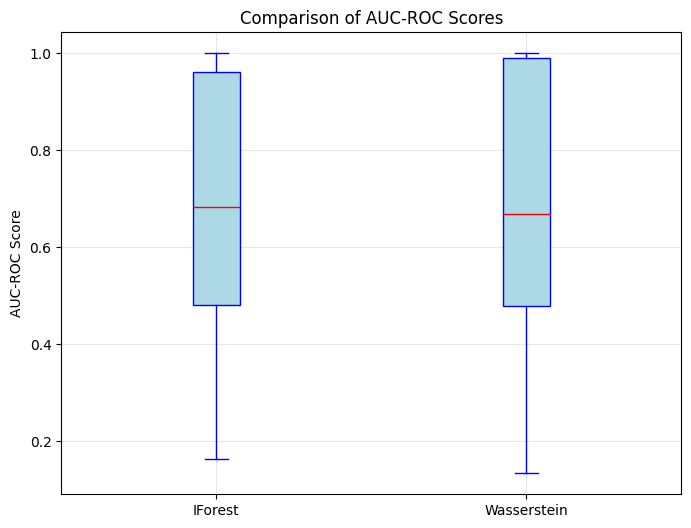

In [10]:
import matplotlib.pyplot as plt

# Extract the AUC-ROC scores from both datasets
auc_iforest = log_file_iforest["AUC ROC"]
auc_wasserstein = log_file_wasserstein["AUC ROC"]

# Combine the AUC scores into a list for box plot
data = [auc_iforest, auc_wasserstein]

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['IForest', 'Wasserstein'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

# Add labels and title
plt.ylabel('AUC-ROC Score')
plt.title('Comparison of AUC-ROC Scores')

# Show the plot
plt.grid(alpha=0.3)
plt.show()


In [ ]:
cov_matrix = np.cov(data.T)  # Example: replace with your actual covariance matrix
det = np.linalg.det(cov_matrix)
if np.isclose(det, 0):
    print("Covariance matrix is singular!")
else:
    print("Covariance matrix is invertible.")

In [ ]:

from gutenTAG import GutenTAG, TrainingType, LABEL_COLUMN_NAME
import numpy as np
import pandas as pd
import pywt
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from scipy.stats import entropy
from sklearn.metrics import roc_auc_score, accuracy_score
import scipy.stats as stats
import sys
import random
import os
from keras.layers import Dense, Input, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
import random
random.seed(42)
from losses import load_loss
from scipy.signal import find_peaks

ModuleNotFoundError: No module named 'pywt'

In [ ]:
import json
from gutenTAG import GutenTAG, TrainingType, LABEL_COLUMN_NAME
from extract_ts_features import apply_time_series_transformations
from super_dean_ts import super_dean

with open('example.json') as f:
    d = json.load(f)
    print(d)
    config = d
    gutentag = GutenTAG(seed=1)
    gutentag.load_config_dict(config)
    datasets = gutentag.generate(return_timeseries=True)


{'$schema': '../gutenTAG/config/schema/guten-tag-generation-config.schema.yaml', 'base': [{'length': 10000, 'channels': 1, 'semi-supervised': True, 'supervised': True}], 'sine': [{'kind': 'sine', 'frequency': 5.0, 'amplitude': 1.0, 'variance': 0.05}, {'kind': 'sine', 'frequency': 2.3, 'amplitude': 2.5, 'variance': 0.05, 'offset': -2.0, 'freq-mod': 0.5}, {'kind': 'sine', 'frequency': 12.4, 'amplitude': 0.5, 'variance': 0.05, 'offset': 1.3, 'freq-mod': 0.01}, {'kind': 'sine', 'frequency': 2.3, 'amplitude': 2.5, 'variance': 0.05, 'offset': -2.0, 'freq-mod': 0.5, 'trend': {'kind': 'polynomial', 'polynomial': [2, 2]}}, {'kind': 'sine', 'frequency': 5.0, 'amplitude': 2, 'variance': 0.1, 'trend': {'kind': 'sine', 'frequency': 0.1, 'amplitude': 0.5, 'variance': 0}}, {'kind': 'sine', 'frequency': 0.1, 'amplitude': 0.5, 'variance': 0.05}], 'ecg': [{'kind': 'ecg', 'frequency': 5.0, 'variance': 0.05}, {'kind': 'ecg', 'frequency': 6.5, 'variance': 0.05}, {'kind': 'ecg', 'frequency': 1, 'variance': 

Initializing addons: 0it [00:00, ?it/s]
Generating datasets:   0%|          | 0/193 [00:03<?, ?it/s]
Finalizing addons: 0it [00:00, ?it/s]


In [ ]:
import random

list_dataset_40 = []
multiples_of_3 = [num for num in range(1, 193*3+1) if num % 3 == 0]
print(multiples_of_3)
# Calculate 20% of the length of the list
sample_size = int(len(multiples_of_3) * 0.2)

# Randomly choose 20% of the numbers
random_sample = random.sample(multiples_of_3, sample_size)
len(random_sample)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 444, 447, 450, 453, 456, 459, 462, 465, 468, 471, 474, 477, 480, 483, 486, 489, 492, 495, 498, 501, 504, 507, 510, 513, 516, 519, 522, 525, 528, 531, 534, 537, 540, 543, 546, 549, 552, 555, 558, 561, 564, 567, 570, 573, 576, 579]


38

In [ ]:
print(random_sample)

[492, 87, 21, 570, 213, 189, 174, 108, 81, 522, 420, 69, 456, 327, 27, 24, 72, 168, 180, 390, 465, 573, 432, 153, 501, 549, 324, 171, 345, 453, 216, 6, 123, 540, 264, 489, 120, 528]


In [ ]:
log_file = pd.read_csv("gutentag 38 dataset (20% random sample).csv")
log_file

dataset name                                anomaly score train  \
0     sine-noise-00%  [0.4946854323148727, 0.5082784354686737, 0.508...   
1     sine-noise-01%  [0.4922694623470306, 0.4832854926586151, 0.479...   
2     sine-noise-10%  [0.4730213701725006, 0.39990184307098386, 0.42...   
3     sine-noise-30%  [0.5490725576877594, 0.5156567633152008, 0.495...   
4     sine-noise-50%  [0.5267735183238983, 0.46241502463817596, 0.49...   
..               ...                                                ...   
144     rw-length-50  [0.47782584130764005, 0.4583763986825943, 0.47...   
145    rw-length-100  [0.47662538290023804, 0.47724094092845915, 0.4...   
146    rw-length-500  [0.40891353487968446, 0.4268134742975235, 0.42...   
147   rw-length-1000  [0.4843266993761063, 0.4797579735517502, 0.484...   
148  rw-trend-linear  [0.9148931920528411, 0.8689267039299011, 0.905...   

                                    anomaly score test   AUC ROC  \
0    [0.4946906745433807, 0.5082833349704743, 0.508...  0.998691   
1    [0.49310582280159, 0.4907426178455353, 0.48319...  0.444503   
2    [0.49338442981243136, 0.44025937616825106, 0.4...  0.364235   
3    [0.45725575983524325, 0.4318968653678894, 0.45...  0.725698   
4    [0.502616211771965, 0.4817885756492615, 0.4677...  0.586703   
..                                                 ...       ...   
144  [0.5154469072818756, 0.5256537884473801, 0.513...  0.620137   
145  [0.5482304066419601, 0.5453912168741226, 0.540...  0.568244   
146  [0.5703797549009323, 0.5680361568927765, 0.569...  0.505275   
147  [0.5657573997974396, 0.6161012947559357, 0.587...  0.431257   
148  [0.9999999403953552, 0.9999999403953552, 0.999...  0.500000   

                                           test labels  index of dataset  
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0.0  
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               3.0  
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               6.0  
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               9.0  
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              12.0  
..                                                 ...               ...  
144  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             432.0  
145  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             435.0  
146  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             438.0  
147  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             441.0  
148  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             444.0  

[149 rows x 6 columns]

In [ ]:
datasets[0].timeseries

value-0  is_anomaly
timestamp                          
0          0.000000e+00           0
1          3.090469e-01           0
2          5.878361e-01           0
3          8.090724e-01           0
4          9.510953e-01           0
...                 ...         ...
9995      -9.510953e-01           0
9996      -8.090724e-01           0
9997      -5.878361e-01           0
9998      -3.090469e-01           0
9999      -3.214166e-13           0

[10000 rows x 2 columns]

In [ ]:
iter=0
df_test = datasets[iter].timeseries
df_train = datasets[iter+1].timeseries
name = datasets[iter].name

#run the script

out_metric, out_tr, out_test, feature_imp = super_dean(df_train, df_test)
count=1
#save the output
log_file=pd.DataFrame([])
log_file.loc[count,"dataset name"]=name
log_file.loc[count,"anomaly score train"] = str(list(out_tr))
log_file.loc[count,"anomaly score test"] = str(list(out_test))
log_file.loc[count,"test labels"] = str(list(datasets[iter].timeseries["is_anomaly"]))
log_file.loc[count,"AUC ROC"]=out_metric
log_file.loc[count,"index of dataset"]=iter
log_file.loc[count,"feature importance"]=str(list(feature_imp))
log_file.to_csv("gutentag 38 dataset (20% random sample).csv", index=False)

Training model 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.08350252525252526
[2 1 5 7 0]
feature : 5
Training model 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.08669191919191914
[7 4 2 8 3]
feature : 5
Training model 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.20802979797979798
[1 4 5 3 2]
feature : 5
Training model 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.0366747474747475
[7 0 3 6 2]
feature : 5
Training model 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.16858585858585862
[5 3 4 1 0]
feature : 5
Training model 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC:  0.062122727272727246
[1 0 8 9 6]
feature : 5
Training model 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━

ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
log_file=pd.DataFrame([])
log_file.loc[count,"dataset name"]=name
log_file.loc[count,"anomaly score train"] = str(list(out_tr))
log_file.loc[count,"anomaly score test"] = str(list(out_test))
log_file.loc[count,"test labels"] = str(list(datasets[iter].timeseries["is_anomaly"]))
log_file.loc[count,"AUC ROC"]=out_metric
log_file.loc[count,"index of dataset"]=iter
log_file.loc[count,"feature importance"]=str(list(feature_imp))
log_file.to_csv("gutentag 38 dataset (20% random sample).csv", index=False)

In [ ]:
len(list(out_tr))

10000

In [ ]:
log_file.to_csv("gutentag 38 dataset (20% random sample).csv", index=False)

In [ ]:
log_file

dataset name                                anomaly score train  \
0         sine-noise-00%  [0.4946854323148727, 0.5082784354686737, 0.508...   
1         sine-noise-01%  [0.4922694623470306, 0.4832854926586151, 0.479...   
2         sine-noise-10%  [0.4730213701725006, 0.39990184307098386, 0.42...   
3         sine-noise-30%  [0.5490725576877594, 0.5156567633152008, 0.495...   
4         sine-noise-50%  [0.5267735183238983, 0.46241502463817596, 0.49...   
..                   ...                                                ...   
102     cbf-diff-count-5  [0.49762569963932035, 0.5105202943086624, 0.50...   
103     cbf-diff-count-6  [0.4744245558977127, 0.48988121151924136, 0.44...   
104     cbf-diff-count-7  [0.49593047201633456, 0.49908092319965364, 0.4...   
105  cbf-combined-diff-1  [0.5219060391187668, 0.5094943821430207, 0.506...   
106  cbf-combined-diff-2  [0.7457451581954956, 0.7943696290254593, 0.792...   

                                    anomaly score test   AUC ROC  \
0    [0.4946906745433807, 0.5082833349704743, 0.508...  0.998691   
1    [0.49310582280159, 0.4907426178455353, 0.48319...  0.444503   
2    [0.49338442981243136, 0.44025937616825106, 0.4...  0.364235   
3    [0.45725575983524325, 0.4318968653678894, 0.45...  0.725698   
4    [0.502616211771965, 0.4817885756492615, 0.4677...  0.586703   
..                                                 ...       ...   
102  [0.5045152485370636, 0.500455892086029, 0.5109...  0.380249   
103  [0.4715935617685318, 0.48351512253284457, 0.49...  0.573951   
104  [0.4956358730792999, 0.4939857333898544, 0.492...  0.518171   
105  [0.5229943454265594, 0.5018763184547425, 0.510...  0.694194   
106  [0.9530090391635895, 0.9520381569862366, 0.951...  0.386945   

                                           test labels  index of dataset  
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0.0  
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               3.0  
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               6.0  
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               9.0  
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              12.0  
..                                                 ...               ...  
102  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             306.0  
103  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             309.0  
104  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             312.0  
105  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             315.0  
106  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             318.0  

[107 rows x 6 columns]

In [ ]:
datasets[3]

TimeSeries(name='sine-noise-01%', training_type=<TrainingType.TEST: 'test'>, timeseries=            value-0  is_anomaly
timestamp                      
0         -0.012866           0
1          0.313207           0
2          0.587927           0
3          0.822855           0
4          0.963457           0
...             ...         ...
9995      -0.967757           0
9996      -0.803100           0
9997      -0.583082           0
9998      -0.301751           0
9999       0.014592           0

[10000 rows x 2 columns])

In [ ]:
log_file = log_file.drop(log_file.index[-1])

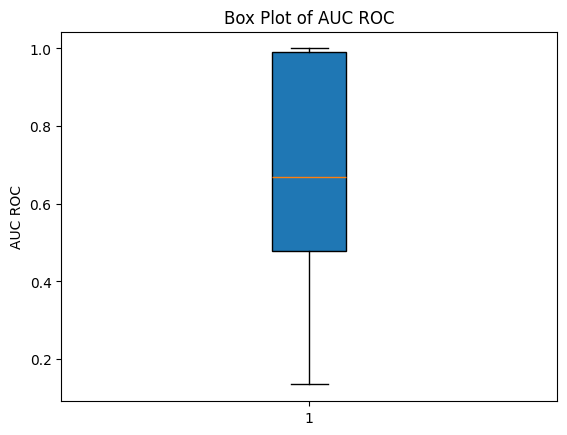

In [5]:
import matplotlib.pyplot as plt

# Assuming log_file is a pandas DataFrame and has an "AUC ROC" column
plt.boxplot(log_file["AUC ROC"], patch_artist=True)

# Add titles and labels
plt.title("Box Plot of AUC ROC")
plt.ylabel("AUC ROC")

# Display the plot
plt.show()


In [ ]:
log_file

dataset name                                anomaly score train  \
0         sine-noise-00%  [0.4946854323148727, 0.5082784354686737, 0.508...   
1         sine-noise-01%  [0.4922694623470306, 0.4832854926586151, 0.479...   
2         sine-noise-10%  [0.4730213701725006, 0.39990184307098386, 0.42...   
3         sine-noise-30%  [0.5490725576877594, 0.5156567633152008, 0.495...   
4         sine-noise-50%  [0.5267735183238983, 0.46241502463817596, 0.49...   
..                   ...                                                ...   
102     cbf-diff-count-5  [0.49762569963932035, 0.5105202943086624, 0.50...   
103     cbf-diff-count-6  [0.4744245558977127, 0.48988121151924136, 0.44...   
104     cbf-diff-count-7  [0.49593047201633456, 0.49908092319965364, 0.4...   
105  cbf-combined-diff-1  [0.5219060391187668, 0.5094943821430207, 0.506...   
106  cbf-combined-diff-2  [0.7457451581954956, 0.7943696290254593, 0.792...   

                                    anomaly score test   AUC ROC  \
0    [0.4946906745433807, 0.5082833349704743, 0.508...  0.998691   
1    [0.49310582280159, 0.4907426178455353, 0.48319...  0.444503   
2    [0.49338442981243136, 0.44025937616825106, 0.4...  0.364235   
3    [0.45725575983524325, 0.4318968653678894, 0.45...  0.725698   
4    [0.502616211771965, 0.4817885756492615, 0.4677...  0.586703   
..                                                 ...       ...   
102  [0.5045152485370636, 0.500455892086029, 0.5109...  0.380249   
103  [0.4715935617685318, 0.48351512253284457, 0.49...  0.573951   
104  [0.4956358730792999, 0.4939857333898544, 0.492...  0.518171   
105  [0.5229943454265594, 0.5018763184547425, 0.510...  0.694194   
106  [0.9530090391635895, 0.9520381569862366, 0.951...  0.386945   

                                           test labels  index of dataset  
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               0.0  
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               3.0  
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               6.0  
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...               9.0  
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...              12.0  
..                                                 ...               ...  
102  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             306.0  
103  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             309.0  
104  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             312.0  
105  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             315.0  
106  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...             318.0  

[107 rows x 6 columns]

In [ ]:
len(log_file)

107

In [ ]:
print(count)

107


In [ ]:
log_file_iforest = pd.read_csv("")

In [ ]:
import gc
count = len(log_file)
print(count)
i = len(log_file)*3
for iter in random_sample:
        print(f"executing {count+1}th data set")
        df_test = datasets[iter].timeseries
        df_train = datasets[iter+1].timeseries
        name = datasets[iter].name

        #run the script

        out_metric, out_tr, out_test,feature_imp = super_dean(df_train, df_test)

        #save the output
        log_file.loc[count,"dataset name"]=name
        print(len(out_tr))
        log_file.at[count,"anomaly score train"] = str(out_tr.tolist())
        log_file.at[count,"anomaly score test"] = str(out_test.tolist())
        log_file.at[count,"test labels"] = str(list(datasets[iter].timeseries["is_anomaly"]))
        log_file.loc[count,"AUC ROC"]=out_metric
        log_file.loc[count,"index of dataset"]=iter
        log_file.loc[count,"feature importance"]=str(list(feature_imp))
        log_file.to_csv("gutentag 38 dataset (20% random sample).csv", index=False)
        del df_train, df_test, out_tr, out_test, out_metric
        gc.collect()
        count+=1


1
executing 2th data set
Training model 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.38875063157894735
[1 6 5 0 9]
feature : 5
Training model 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.2741048421052632
[4 2 1 5 0]
feature : 5
Training model 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.6187368421052631
[8 2 3 9 6]
feature : 5
Training model 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC:  0.6193722105263157
[7 6 1 4 2]
feature : 5
Training model 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC:  0.6191157894736842
[7 4 8 2 3]
feature : 5
Training model 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC:  0.30274810526315793
[3 7 6 5 4]
feature : 5
Training model 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/31

In [ ]:
print(len(out_tr))
print(len(out_test))
print(len(datasets[iter].timeseries["is_anomaly"]))


10000
10000
10000


In [6]:
!pip install timeeval-gutenTAG
!pip install PyWavelets
!pip install pyod

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=046cb69e01f1855c5fbb1868f879e013c507364cbe7abe850d0b8b8dcd19956f
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [ ]:
log_file.loc[count,"anomaly score train"] = out_tr.tolist()

ValueError: Must have equal len keys and value when setting with an iterable

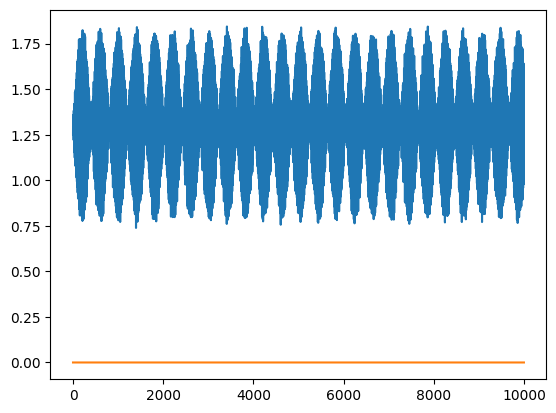

In [ ]:
plt.plot(datasets[54*3+1].timeseries[["value-0", "is_anomaly"]])

In [ ]:
import pandas as pd
df = pd.DataFrame({"dataset name":[], "anomaly score train":[], "anomaly score test":[], "AUC ROC": [], "test labels":[], "index of dataset":[]})
df.to_csv("gutentag 195 dataset.csv", index=False)


In [ ]:
for name in unique_dataset_names:
    if unique_dataset_names == name and dataset

TypeError: list indices must be integers or slices, not str

In [ ]:
datasets[5]


TimeSeries(name='sine-noise-01%', training_type=<TrainingType.TRAIN_ANOMALIES: 'train-anomaly'>, timeseries=            value-0  is_anomaly
timestamp                      
0          0.004276           0
1          0.304136           0
2          0.598640           0
3          0.812665           0
4          0.956284           0
...             ...         ...
9995      -0.959071           0
9996      -0.810572           0
9997      -0.592849           0
9998      -0.313990           0
9999       0.002817           0

[10000 rows x 2 columns])

In [ ]:
datasets[1].training_type==TrainingType.TRAIN_NO_ANOMALIES


False

In [ ]:
datasets[2]


TimeSeries(name='sine-noise-00%', training_type=<TrainingType.TRAIN_ANOMALIES: 'train-anomaly'>, timeseries=                value-0  is_anomaly
timestamp                          
0          0.000000e+00           0
1          3.090469e-01           0
2          5.878361e-01           0
3          8.090724e-01           0
4          9.510953e-01           0
...                 ...         ...
9995      -9.510953e-01           0
9996      -8.090724e-01           0
9997      -5.878361e-01           0
9998      -3.090469e-01           0
9999      -3.214166e-13           0

[10000 rows x 2 columns])

In [ ]:
columns_identical = datasets[1].timeseries["value-0"].equals(datasets[2].timeseries["value-0"])
print(columns_identical)

False


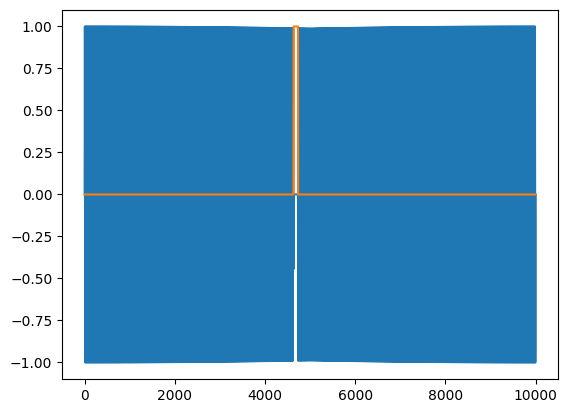

In [ ]:
import matplotlib.pyplot as plt
plt.plot(datasets[0].timeseries)


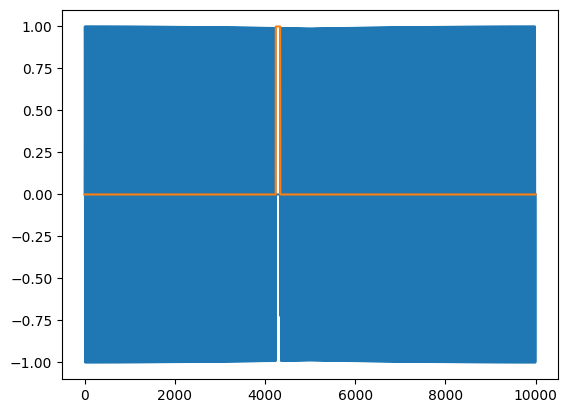

In [ ]:
plt.plot(datasets[2].timeseries)

value-0       value-1       value-2       value-3  \
timestamp                                                           
0         -1.013945e+00 -1.012839e+00 -9.504060e-01 -1.046795e+00   
1         -1.090441e+01 -1.099160e+01 -1.096648e+01 -1.108178e+01   
2         -4.706424e+01 -4.696779e+01 -4.702266e+01 -4.695324e+01   
3         -9.703870e+01 -9.708999e+01 -9.699553e+01 -9.700301e+01   
4         -1.250246e+02 -1.250973e+02 -1.250626e+02 -1.249381e+02   
...                 ...           ...           ...           ...   
9995       9.976020e+15  9.976020e+15  9.976020e+15  9.976020e+15   
9996       9.980014e+15  9.980014e+15  9.980014e+15  9.980014e+15   
9997       9.984008e+15  9.984008e+15  9.984008e+15  9.984008e+15   
9998       9.988004e+15  9.988004e+15  9.988004e+15  9.988004e+15   
9999       9.992001e+15  9.992001e+15  9.992001e+15  9.992001e+15   

                value-4       value-5       value-6       value-7  \
timestamp                                                           
0         -9.344802e-01 -1.011889e+00 -9.649037e-01 -9.176008e-01   
1         -1.110796e+01 -1.089366e+01 -1.098280e+01 -1.098571e+01   
2         -4.701522e+01 -4.700523e+01 -4.692794e+01 -4.697802e+01   
3         -9.693458e+01 -9.706961e+01 -9.707838e+01 -9.701223e+01   
4         -1.249738e+02 -1.249861e+02 -1.249989e+02 -1.250353e+02   
...                 ...           ...           ...           ...   
9995       9.976020e+15  9.976020e+15  9.976020e+15  9.976020e+15   
9996       9.980014e+15  9.980014e+15  9.980014e+15  9.980014e+15   
9997       9.984008e+15  9.984008e+15  9.984008e+15  9.984008e+15   
9998       9.988004e+15  9.988004e+15  9.988004e+15  9.988004e+15   
9999       9.992001e+15  9.992001e+15  9.992001e+15  9.992001e+15   

                value-8       value-9  ...      value-11      value-12  \
timestamp                              ...                               
0         -9.415568e-01 -1.020410e+00  ... -9.589480e-01 -9.323515e-01   
1         -1.102982e+01 -1.104170e+01  ... -1.104908e+01 -1.107903e+01   
2         -4.700811e+01 -4.705297e+01  ... -4.690469e+01 -4.701708e+01   
3         -9.701135e+01 -9.698260e+01  ... -9.710845e+01 -9.704374e+01   
4         -1.250101e+02 -1.250363e+02  ... -1.250106e+02 -1.250153e+02   
...                 ...           ...  ...           ...           ...   
9995       9.976020e+15  9.976020e+15  ...  9.976020e+15  9.976020e+15   
9996       9.980014e+15  9.980014e+15  ...  9.980014e+15  9.980014e+15   
9997       9.984008e+15  9.984008e+15  ...  9.984008e+15  9.984008e+15   
9998       9.988004e+15  9.988004e+15  ...  9.988004e+15  9.988004e+15   
9999       9.992001e+15  9.992001e+15  ...  9.992001e+15  9.992001e+15   

               value-13      value-14      value-15      value-16  \
timestamp                                                           
0         -9.656159e-01 -9.130953e-01 -1.057106e+00 -1.064806e+00   
1         -1.098193e+01 -1.090964e+01 -1.105599e+01 -1.097704e+01   
2         -4.695844e+01 -4.695445e+01 -4.693848e+01 -4.694058e+01   
3         -9.700611e+01 -9.707974e+01 -9.702667e+01 -9.697747e+01   
4         -1.249814e+02 -1.250673e+02 -1.250736e+02 -1.249554e+02   
...                 ...           ...           ...           ...   
9995       9.976020e+15  9.976020e+15  9.976020e+15  9.976020e+15   
9996       9.980014e+15  9.980014e+15  9.980014e+15  9.980014e+15   
9997       9.984008e+15  9.984008e+15  9.984008e+15  9.984008e+15   
9998       9.988004e+15  9.988004e+15  9.988004e+15  9.988004e+15   
9999       9.992001e+15  9.992001e+15  9.992001e+15  9.992001e+15   

               value-17      value-18      value-19  is_anomaly  
timestamp                                                        
0         -9.857973e-01 -9.720736e-01 -9.488999e-01           0  
1         -1.100618e+01 -1.091857e+01 -1.111118e+01           0  
2         -4.703058e+01 -4.699316e+01 -4.701649e+01           0  
3         -9.706234e+01 -9.70

In [ ]:
datasets[-2].timeseries

value-0       value-1       value-2       value-3  \
timestamp                                                           
0         -1.069342e+00 -1.015814e+00 -9.837483e-01 -1.025661e+00   
1         -1.099553e+01 -1.100751e+01 -1.104144e+01 -1.100049e+01   
2         -4.702851e+01 -4.703210e+01 -4.697793e+01 -4.695493e+01   
3         -9.697084e+01 -9.694735e+01 -9.698064e+01 -9.693118e+01   
4         -1.249986e+02 -1.249613e+02 -1.250048e+02 -1.249699e+02   
...                 ...           ...           ...           ...   
9995       9.976020e+15  9.976020e+15  9.976020e+15  9.976020e+15   
9996       9.980014e+15  9.980014e+15  9.980014e+15  9.980014e+15   
9997       9.984008e+15  9.984008e+15  9.984008e+15  9.984008e+15   
9998       9.988004e+15  9.988004e+15  9.988004e+15  9.988004e+15   
9999       9.992001e+15  9.992001e+15  9.992001e+15  9.992001e+15   

                value-4       value-5       value-6       value-7  \
timestamp                                                           
0         -1.007774e+00 -9.860593e-01 -9.613717e-01 -1.113197e+00   
1         -1.105461e+01 -1.100937e+01 -1.096999e+01 -1.099735e+01   
2         -4.704693e+01 -4.697379e+01 -4.689767e+01 -4.706367e+01   
3         -9.697668e+01 -9.697748e+01 -9.699678e+01 -9.704839e+01   
4         -1.250589e+02 -1.250054e+02 -1.249844e+02 -1.250752e+02   
...                 ...           ...           ...           ...   
9995       9.976020e+15  9.976020e+15  9.976020e+15  9.976020e+15   
9996       9.980014e+15  9.980014e+15  9.980014e+15  9.980014e+15   
9997       9.984008e+15  9.984008e+15  9.984008e+15  9.984008e+15   
9998       9.988004e+15  9.988004e+15  9.988004e+15  9.988004e+15   
9999       9.992001e+15  9.992001e+15  9.992001e+15  9.992001e+15   

                value-8       value-9  ...      value-11      value-12  \
timestamp                              ...                               
0         -9.420207e-01 -9.487958e-01  ... -9.662810e-01 -1.000154e+00   
1         -1.098516e+01 -1.107098e+01  ... -1.105350e+01 -1.098920e+01   
2         -4.693204e+01 -4.703517e+01  ... -4.702929e+01 -4.694210e+01   
3         -9.704746e+01 -9.702481e+01  ... -9.690411e+01 -9.703844e+01   
4         -1.249516e+02 -1.250318e+02  ... -1.249943e+02 -1.250014e+02   
...                 ...           ...  ...           ...           ...   
9995       9.976020e+15  9.976020e+15  ...  9.976020e+15  9.976020e+15   
9996       9.980014e+15  9.980014e+15  ...  9.980014e+15  9.980014e+15   
9997       9.984008e+15  9.984008e+15  ...  9.984008e+15  9.984008e+15   
9998       9.988004e+15  9.988004e+15  ...  9.988004e+15  9.988004e+15   
9999       9.992001e+15  9.992001e+15  ...  9.992001e+15  9.992001e+15   

               value-13      value-14      value-15      value-16  \
timestamp                                                           
0         -1.058251e+00 -1.022005e+00 -9.643422e-01 -1.070501e+00   
1         -1.089857e+01 -1.106868e+01 -1.094894e+01 -1.094458e+01   
2         -4.706171e+01 -4.702812e+01 -4.696315e+01 -4.697464e+01   
3         -9.693961e+01 -9.700225e+01 -9.706287e+01 -9.708274e+01   
4         -1.250074e+02 -1.250099e+02 -1.249573e+02 -1.249855e+02   
...                 ...           ...           ...           ...   
9995       9.976020e+15  9.976020e+15  9.976020e+15  9.976020e+15   
9996       9.980014e+15  9.980014e+15  9.980014e+15  9.980014e+15   
9997       9.984008e+15  9.984008e+15  9.984008e+15  9.984008e+15   
9998       9.988004e+15  9.988004e+15  9.988004e+15  9.988004e+15   
9999       9.992001e+15  9.992001e+15  9.992001e+15  9.992001e+15   

               value-17      value-18      value-19  is_anomaly  
timestamp                                                        
0         -1.052724e+00 -9.868047e-01 -1.014586e+00           0  
1         -1.096144e+01 -1.101136e+01 -1.098643e+01           0  
2         -4.696988e+01 -4.705110e+01 -4.703769e+01           0  
3         -9.707687e+01 -9.69

In [ ]:
len(datasets)

579

In [ ]:
import subprocess

data_dir = '/content/drive/MyDrive/datasets/'  # Adjust this to your actual path
output_dir = '/content/drive/MyDrive/output/'  # Path where results will be saved

datasets = os.listdir(data_dir)
for dataset in datasets:
    dataset_path = os.path.join(data_dir, dataset)

    # Command to run the script with the dataset as an argument
    command = f'python3 my_script.py --input {dataset_path} --output {output_dir}{dataset}_result.txt'

    # Run the Python script using subprocess
    process = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Print or log the result
    print(f'Finished processing {dataset}')
    print(process.stdout.decode('utf-8'))  # This will print the script's output (if any)


In [ ]:
import argparse
import pandas as pd

# Set up argument parser
parser = argparse.ArgumentParser(description="Process a dataset")
parser.add_argument('--input', type=str, help='Path to input dataset')
parser.add_argument('--output', type=str, help='Path to output results')
args = parser.parse_args()

# Load dataset
data = pd.read_csv(args.input)

# Process the dataset (Example: Calculate summary statistics)
summary = data.describe()

# Save the results
with open(args.output, 'w') as f:
    f.write(summary.to_string())


In [ ]:
for dataset in datasets:
    dataset_path = os.path.join(data_dir, dataset)

    # Construct the output file path
    output_file = os.path.join(output_dir, f"{dataset}_result.txt")

    # Command to run the script
    command = f'python3 my_script.py --input {dataset_path} --output {output_file}'

    # Execute the command
    process = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Log the success
    print(f'Successfully processed {dataset}')
